In [32]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./gym_members_exercise_tracking.csv', header=None)

# 열 이름 지정
df.rename(columns=df.iloc[0], inplace=True)
df.drop(df.index[0], inplace=True)

# 데이터 살펴보기
print(df.head())
print('\n')

  Age  Gender Weight (kg) Height (m) Max_BPM Avg_BPM Resting_BPM  \
1  56    Male        88.3       1.71     180     157          60   
2  46  Female        74.9       1.53     179     151          66   
3  32  Female        68.1       1.66     167     122          54   
4  25    Male        53.2        1.7     190     164          56   
5  38    Male        46.1       1.79     188     158          68   

  Session_Duration (hours) Calories_Burned Workout_Type Fat_Percentage  \
1                     1.69          1313.0         Yoga           12.6   
2                      1.3           883.0         HIIT           33.9   
3                     1.11           677.0       Cardio           33.4   
4                     0.59           532.0     Strength           28.8   
5                     0.64           556.0     Strength           29.2   

  Water_Intake (liters) Workout_Frequency (days/week) Experience_Level    BMI  
1                   3.5                             4             

In [33]:
# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 1 to 973
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            973 non-null    object
 1   Gender                         973 non-null    object
 2   Weight (kg)                    973 non-null    object
 3   Height (m)                     973 non-null    object
 4   Max_BPM                        973 non-null    object
 5   Avg_BPM                        973 non-null    object
 6   Resting_BPM                    973 non-null    object
 7   Session_Duration (hours)       973 non-null    object
 8   Calories_Burned                973 non-null    object
 9   Workout_Type                   973 non-null    object
 10  Fat_Percentage                 973 non-null    object
 11  Water_Intake (liters)          973 non-null    object
 12  Workout_Frequency (days/week)  973 non-null    object
 13  Exper

In [34]:
print(df['Session_Duration (hours)'].unique())
df.dropna(subset=['Session_Duration (hours)'], axis=0, inplace=True)   # 누락데이터 행을 삭제


['1.69' '1.3' '1.11' '0.59' '0.64' '1.59' '1.49' '1.27' '1.03' '1.08'
 '0.82' '1.15' '1.24' '1.18' '1.35' '1.13' '1.33' '1.19' '1.37' '1.5'
 '1.12' '1.17' '0.78' '1.25' '1.42' '0.73' '1.48' '1.64' '1.29' '1.04'
 '1.52' '1.32' '1.26' '1.34' '1.31' '1.45' '1.14' '1.2' '0.84' '1.41'
 '1.23' '1.67' '0.81' '1.47' '1.4' '0.56' '1.75' '1.97' '0.62' '1.99'
 '0.89' '1.81' '1.73' '1.07' '0.63' '1.87' '1.78' '0.86' '1.09' '1.93'
 '1.8' '0.58' '1.16' '0.54' '0.97' '1.79' '0.51' '1.74' '1.39' '1.01'
 '1.44' '1.72' '0.55' '1.02' '1.22' '1.0' '1.28' '1.98' '0.66' '1.61'
 '0.68' '1.91' '1.38' '1.53' '0.7' '1.46' '1.95' '0.83' '0.67' '1.36'
 '1.57' '1.55' '1.58' '0.92' '1.1' '1.05' '1.54' '1.66' '1.71' '1.84'
 '1.83' '1.21' '1.6' '0.99' '0.77' '0.93' '0.52' '1.06' '0.96' '1.63'
 '0.8' '0.9' '0.53' '1.62' '1.94' '1.85' '1.43' '0.69' '1.82' '1.7' '1.56'
 '0.57' '1.88' '1.86' '0.85' '1.9' '0.6' '1.77' '0.5' '0.72' '0.88' '1.65'
 '1.51' '0.94' '0.76' '0.91' '0.74' '0.87' '0.61' '1.96' '1.68' '1.76'
 '0.95'

In [35]:
def convert_datatypes(df):
    """
    Convert dataframe columns to appropriate numeric types.
    Returns a dataframe with optimized data types.
    """
    # Dictionary to specify which columns should be int vs float
    int_columns = [
        'Age',
        'Workout_Frequency (days/week)',
        'Experience_Level'
    ]
    
    float_columns = [
        'Weight (kg)',
        'Height (m)',
        'Max_BPM',
        'Avg_BPM',
        'Resting_BPM',
        'Session_Duration (hours)',
        'Calories_Burned',
        'Fat_Percentage',
        'Water_Intake (liters)',
        'BMI'
    ]
    
    # Convert to integer
    for col in int_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
        # Using Int64 instead of int64 to handle potential NaN values
    
    # Convert to float
    for col in float_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Keep Gender and Workout_Type as object (string) type
    return df

In [36]:
df = convert_datatypes(df)

In [37]:
print(df.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
1   56    Male         88.3        1.71      180      157           60   
2   46  Female         74.9        1.53      179      151           66   
3   32  Female         68.1        1.66      167      122           54   
4   25    Male         53.2        1.70      190      164           56   
5   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
1                      1.69           1313.0         Yoga            12.6   
2                      1.30            883.0         HIIT            33.9   
3                      1.11            677.0       Cardio            33.4   
4                      0.59            532.0     Strength            28.8   
5                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
1              

In [98]:
ndf = df[['Age', 'Gender','Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Workout_Type']]

print(ndf.head())
print('\n')

   Age  Gender  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
1   56    Male                      1.69           1313.0            12.6   
2   46  Female                      1.30            883.0            33.9   
3   32  Female                      1.11            677.0            33.4   
4   25    Male                      0.59            532.0            28.8   
5   38    Male                      0.64            556.0            29.2   

  Workout_Type  
1         Yoga  
2         HIIT  
3       Cardio  
4     Strength  
5     Strength  




In [72]:
df_group = df.loc[:, ['Age', 'Gender', 'Session_Duration (hours)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Calories_Burned', 'Fat_Percentage', 'Workout_Type', 'Water_Intake (liters)', 'BMI']]

print('회원 수 :', len(df_group))
print(df_group.head())
print('\n')

# Workout_Type 열 기준 데이터 분할
grouped = df_group.groupby('Workout_Type')
print(grouped)

회원 수 : 973
   Age  Gender  Session_Duration (hours)  Max_BPM  Avg_BPM  Resting_BPM  \
1   56    Male                      1.69      180      157           60   
2   46  Female                      1.30      179      151           66   
3   32  Female                      1.11      167      122           54   
4   25    Male                      0.59      190      164           56   
5   38    Male                      0.64      188      158           68   

   Calories_Burned  Fat_Percentage Workout_Type  Water_Intake (liters)    BMI  
1           1313.0            12.6         Yoga                    3.5  30.20  
2            883.0            33.9         HIIT                    2.1  32.00  
3            677.0            33.4       Cardio                    2.3  24.71  
4            532.0            28.8     Strength                    2.1  18.41  
5            556.0            29.2     Strength                    2.8  14.39  




In [73]:
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))
    print(group.head())
    print('\n')

* key : Cardio
* number : 255
    Age  Gender  Session_Duration (hours)  Max_BPM  Avg_BPM  Resting_BPM  \
3    32  Female                      1.11      167      122           54   
7    36    Male                      1.49      174      169           73   
8    40  Female                      1.27      189      141           64   
10   28    Male                      1.08      169      136           64   
13   57    Male                      1.24      195      165           61   

    Calories_Burned  Fat_Percentage Workout_Type  Water_Intake (liters)    BMI  
3             677.0            33.4       Cardio                    2.3  24.71  
7            1385.0            21.3       Cardio                    2.3  23.76  
8             895.0            30.6       Cardio                    1.9  30.57  
10            808.0            29.7       Cardio                    2.7  30.07  
13           1013.0            22.1       Cardio                    2.7  43.40  


* key : HIIT
* number : 2

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 1 to 973
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    Int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    Int

In [75]:
# 문자열인 Gender, Workout_Type 열을 제외하고 모든 열의 평균값을 구함
# 숫자형 데이터만 요약

average = grouped.mean(numeric_only=True)
print(average)

                    Age  Session_Duration (hours)     Max_BPM     Avg_BPM  \
Workout_Type                                                                
Cardio        37.670588                  1.220078  179.874510  143.890196   
HIIT          38.945701                  1.287059  180.113122  143.524887   
Strength      38.949612                  1.260155  179.027132  144.313953   
Yoga           39.23431                  1.262845  180.606695  143.267782   

              Resting_BPM  Calories_Burned  Fat_Percentage  \
Workout_Type                                                 
Cardio          61.988235       884.513725       25.397647   
HIIT            62.687783       925.805430       24.461086   
Strength        62.465116       910.697674       25.459302   
Yoga            61.782427       903.188285       24.483682   

              Water_Intake (liters)        BMI  
Workout_Type                                    
Cardio                     2.616863  25.377686  
HIIT             

In [76]:
grouped_two = df_group.groupby(['Workout_Type', 'Gender'])

for key, group in grouped_two:
    print('* key :', key)
    print('* number :', len(group))
    print(group.head())
    print('\n')

* key : ('Cardio', 'Female')
* number : 126
    Age  Gender  Session_Duration (hours)  Max_BPM  Avg_BPM  Resting_BPM  \
3    32  Female                      1.11      167      122           54   
8    40  Female                      1.27      189      141           64   
18   41  Female                      1.19      182      165           58   
34   24  Female                      1.04      187      157           68   
37   56  Female                      1.26      182      155           57   

    Calories_Burned  Fat_Percentage Workout_Type  Water_Intake (liters)    BMI  
3             677.0            33.4       Cardio                    2.3  24.71  
8             895.0            30.6       Cardio                    1.9  30.57  
18            884.0            31.9       Cardio                    1.6  13.98  
34            816.0            31.7       Cardio                    2.5  25.83  
37            879.0            33.4       Cardio                    2.6  24.37  


* key : ('C

In [77]:
average_two = grouped_two.mean(numeric_only=True)
print(average_two)
print('\n')
print(type(average_two))

                           Age  Session_Duration (hours)     Max_BPM  \
Workout_Type Gender                                                    
Cardio       Female  37.015873                  1.206746  180.833333   
             Male    38.310078                  1.233101  178.937984   
HIIT         Female  39.560748                  1.270748  178.943925   
             Male    38.368421                  1.302368  181.210526   
Strength     Female  38.731707                  1.275528  179.040650   
             Male    39.148148                  1.246148  179.014815   
Yoga         Female  38.207547                  1.298019  180.141509   
             Male    40.052632                  1.234812  180.977444   

                        Avg_BPM  Resting_BPM  Calories_Burned  Fat_Percentage  \
Workout_Type Gender                                                             
Cardio       Female  144.134921    61.825397       834.793651       27.938889   
             Male    143.651163    6

In [ ]:
std_all = grouped.std(numeric_only=True)
print(std_all)
print('\n')
print(type(std_all))
print('\n')

std_calories = grouped.Calories_Burned.std()
print(std_calories)
print('\n')
print(type(std_calories))

                    Age  Session_Duration (hours)    Max_BPM    Avg_BPM  \
Workout_Type                                                              
Cardio        12.269983                  0.344066  11.632832  13.965216   
HIIT          12.246957                  0.327599  11.507739  14.278260   
Strength      12.084712                  0.335360  11.546019  15.082080   
Yoga          12.141131                  0.362277  11.418147  14.055541   

              Resting_BPM  Calories_Burned  Fat_Percentage  \
Workout_Type                                                 
Cardio           7.070223       270.196033        6.051530   
HIIT             7.346445       274.494781        6.657335   
Strength         7.473477       270.264091        6.211813   
Yoga             7.428846       276.141637        6.112471   

              Water_Intake (liters)       BMI  
Workout_Type                                   
Cardio                     0.598283  6.782362  
HIIT                       0.628

              Age  Session_Duration (hours)  Max_BPM  Avg_BPM  Resting_BPM  \
Workout_Type                                                                 
Cardio         59                      1.99      199      169           74   
HIIT           59                      1.99      199      169           74   
Strength       59                      2.00      199      169           74   
Yoga           59                      1.99      199      169           74   

              Calories_Burned  Fat_Percentage  Water_Intake (liters)    BMI  
Workout_Type                                                                 
Cardio                 1625.0            34.9                    3.7  46.94  
HIIT                   1766.0            35.0                    3.7  46.90  
Strength               1783.0            35.0                    3.7  48.43  
Yoga                   1582.0            34.9                    3.7  49.84  


<class 'pandas.core.frame.DataFrame'>
              Age  Sess

In [137]:
agg_all = grouped.agg(['min', 'max'])
print(agg_all.head())
print('\n')

             Age      Gender       Session_Duration (hours)       Max_BPM  \
             min max     min   max                      min   max     min   
Workout_Type                                                                
Cardio        18  59  Female  Male                     0.51  1.99     160   
HIIT          18  59  Female  Male                     0.53  1.99     160   
Strength      18  59  Female  Male                     0.51  2.00     160   
Yoga          18  59  Female  Male                     0.50  1.99     160   

                  Avg_BPM      Resting_BPM     Calories_Burned          \
              max     min  max         min max             min     max   
Workout_Type                                                             
Cardio        199     120  169          50  74           303.0  1625.0   
HIIT          199     120  169          50  74           333.0  1766.0   
Strength      199     120  169          50  74           350.0  1783.0   
Yoga          19

In [141]:
calories_mean = grouped.Calories_Burned.mean()
print(calories_mean)
print('\n')

calories_std = grouped.Calories_Burned.std()
print(calories_std)
print('\n')

for key, group in grouped.Calories_Burned:
    group_z_score = (group - calories_mean.loc[key]) / calories_std.loc[key]
    print('* origin :', key)
    print(group_z_score.head(3))
    print('\n')

# z-score가 3보다 크거나 -3보다 작은 데이터를 이상치로 간주
def z_score_outlier(series, threshold=3):
    return (np.abs(series - series.mean()) > threshold * series.std())

# 이상치를 출력
for key, group in grouped.Calories_Burned:
    outliers = group[z_score_outlier(group)]
    print('* origin :', key)
    print(outliers)
    print('\n')

# 이상치의 개수 출력
for key, group in grouped.Calories_Burned:
    outliers = group[z_score_outlier(group)]
    print('* origin :', key)
    print(len(outliers))
    print('\n')

# z-score 정규화
def z_score_normalize(series):
    return (series - series.mean()) / series.std()


Workout_Type
Cardio      884.513725
HIIT        925.805430
Strength    910.697674
Yoga        903.188285
Name: Calories_Burned, dtype: float64


Workout_Type
Cardio      270.196033
HIIT        274.494781
Strength    270.264091
Yoga        276.141637
Name: Calories_Burned, dtype: float64


* origin : Cardio
3   -0.768012
7    1.852308
8    0.038810
Name: Calories_Burned, dtype: float64


* origin : HIIT
2    -0.155943
6     0.692890
11   -1.212429
Name: Calories_Burned, dtype: float64


* origin : Strength
4   -1.401213
5   -1.312411
9   -0.709298
Name: Calories_Burned, dtype: float64


* origin : Yoga
1     1.484063
15    1.056747
23   -0.199855
Name: Calories_Burned, dtype: float64


* origin : Cardio
Series([], Name: Calories_Burned, dtype: float64)


* origin : HIIT
713    1766.0
Name: Calories_Burned, dtype: float64


* origin : Strength
512    1725.0
911    1783.0
Name: Calories_Burned, dtype: float64


* origin : Yoga
Series([], Name: Calories_Burned, dtype: float64)


* origin :

C:\Users\user\AppData\Local\Temp\ipykernel_46240\2833624154.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Workout Type')


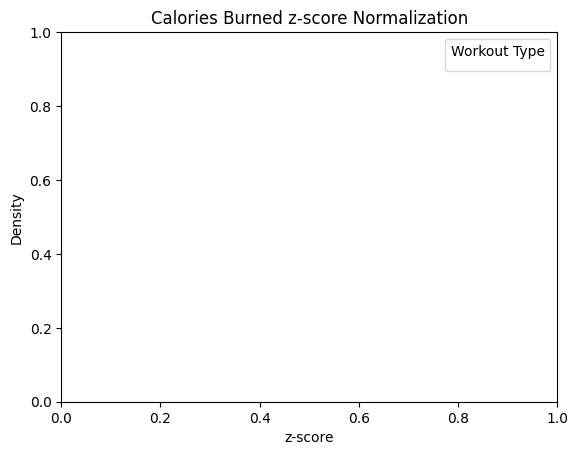

In [ ]:
# 이상치 제거
def remove_outlier(series, threshold=3):
    z_scores = z_score_normalize(series)
    return series[np.abs(z_scores) <= threshold]

<Axes: xlabel='Calories_Burned', ylabel='Fat_Percentage'>

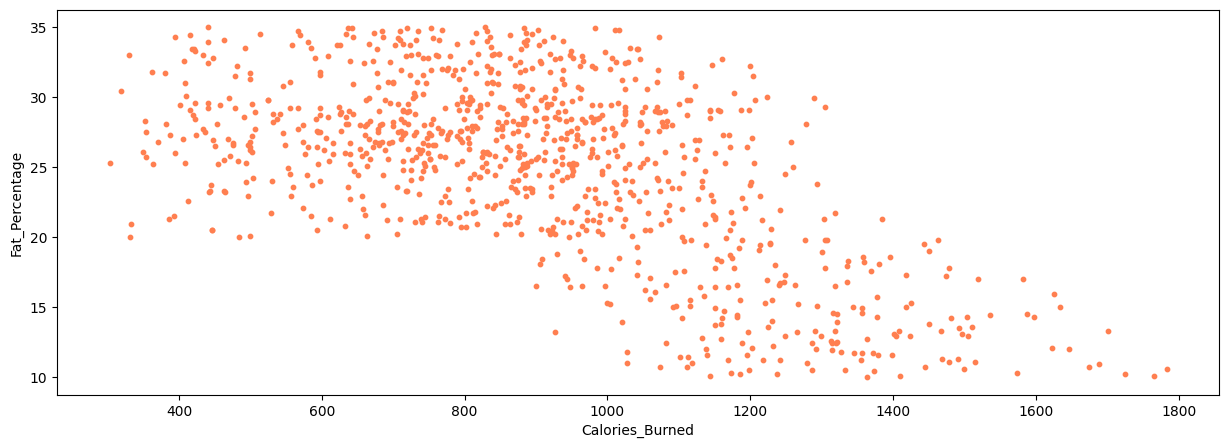

In [99]:

ndf.plot(kind='scatter', x='Calories_Burned', y='Fat_Percentage', c='coral', s=10, figsize=(15, 5))

<Axes: ylabel='Frequency'>

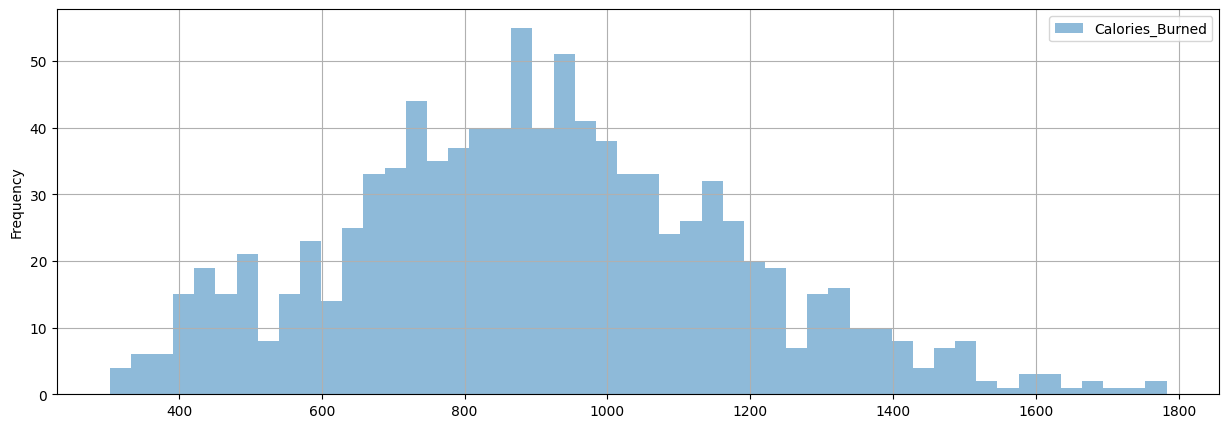

In [100]:
ndf.plot(kind='hist', y='Calories_Burned', bins=50, grid=True, alpha=0.5, figsize=(15, 5))

<Axes: ylabel='Frequency'>

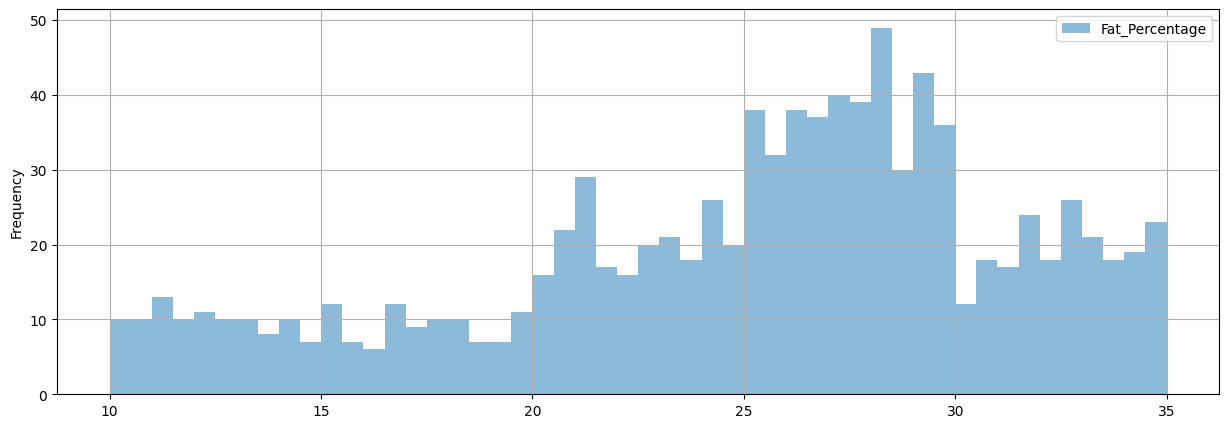

In [106]:
ndf.plot(kind='hist', y='Fat_Percentage', bins=50, grid=True, alpha=0.5, figsize=(15, 5))

"\n# 이상치 제거\ndef remove_outlier(df, column):\n    # Q1, Q3 구하기\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    # 이상치 제거\n    df = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]\n    return df\n\n# 이상치 제거\nndf = remove_outlier(ndf, 'Calories_Burned')\nndf.plot(kind='box', y='Calories_Burned', x='Workout_Type', figsize=(10, 5))\n"

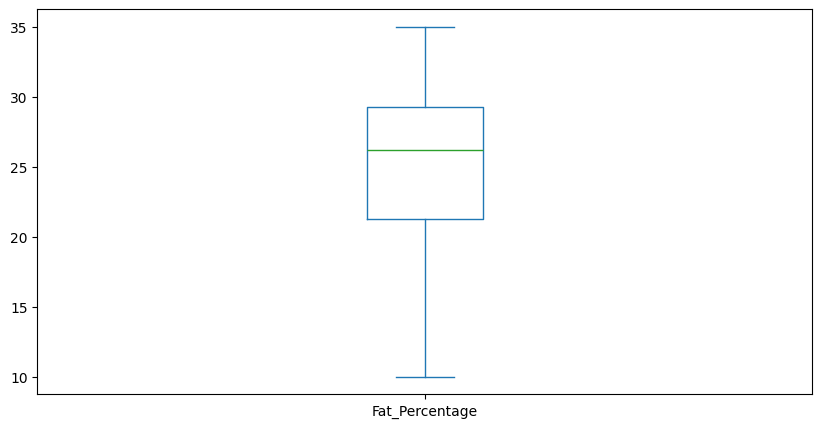

In [103]:
ndf.plot(kind='box', x='Calories_Burned', y='Fat_Percentage', figsize=(10, 5))
'''
# 이상치 제거
def remove_outlier(df, column):
    # Q1, Q3 구하기
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # 이상치 제거
    df = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return df

# 이상치 제거
ndf = remove_outlier(ndf, 'Calories_Burned')
ndf.plot(kind='box', y='Calories_Burned', x='Workout_Type', figsize=(10, 5))
'''

In [104]:
print(len(ndf))

973


<Axes: xlabel='Session_Duration (hours)', ylabel='Calories_Burned'>

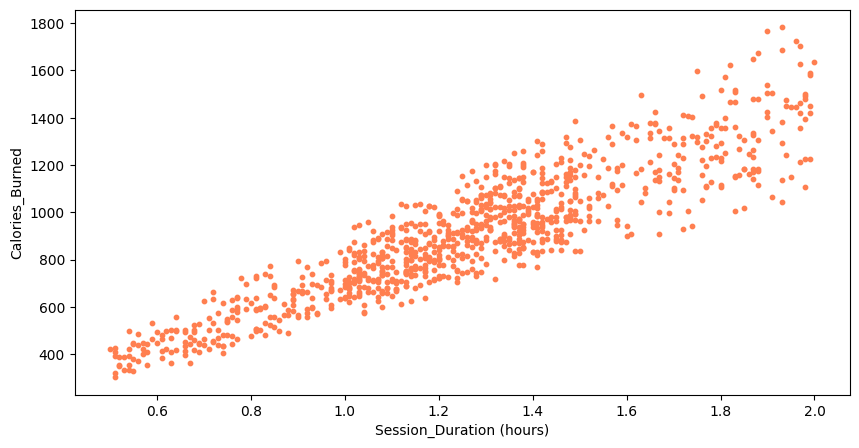

In [114]:
ndf.plot(kind='scatter', y='Calories_Burned', x='Session_Duration (hours)', c='coral', s=10, figsize=(10, 5))

<Axes: >

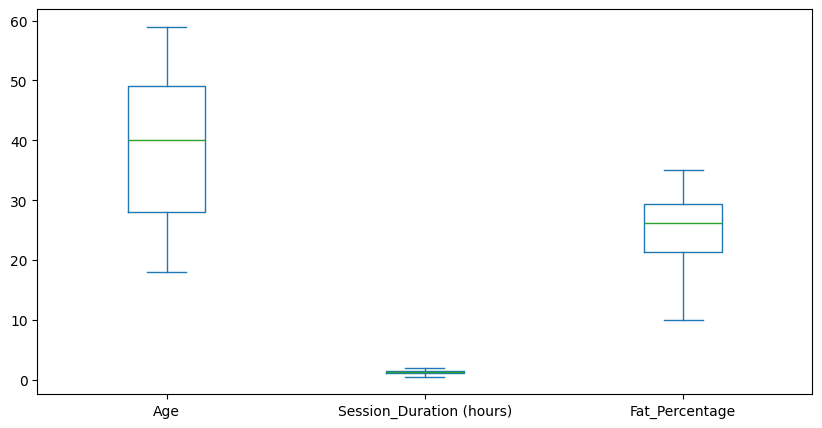

In [113]:
ndf.plot(kind='box', x='Calories_Burned', figsize=(10, 5))

<Axes: xlabel='Session_Duration (hours)', ylabel='Fat_Percentage'>

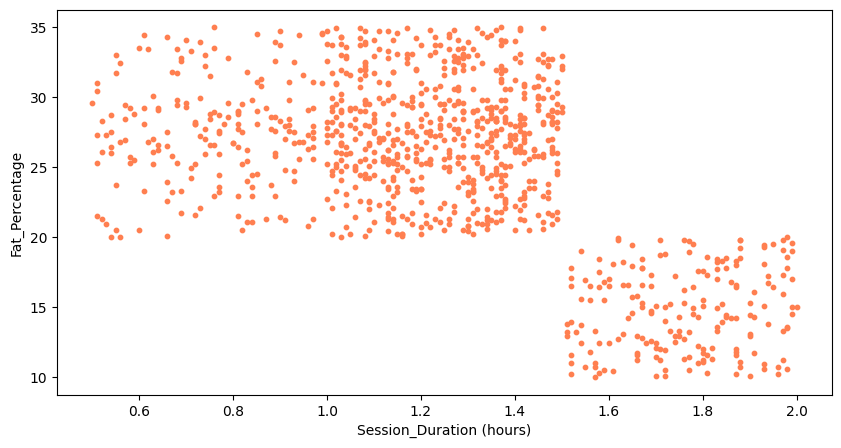

In [41]:
ndf.plot(kind='scatter', y='Fat_Percentage', x='Session_Duration (hours)', c='coral', s=10, figsize=(10, 5))

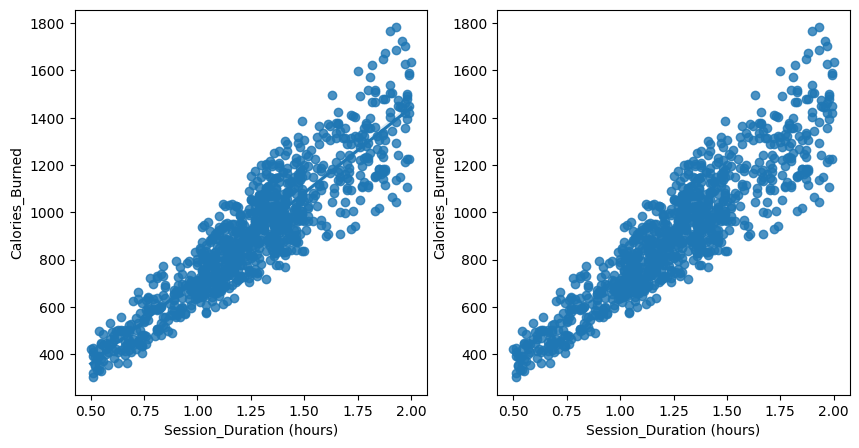

In [42]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='Session_Duration (hours)', y='Calories_Burned', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='Session_Duration (hours)', y='Calories_Burned', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

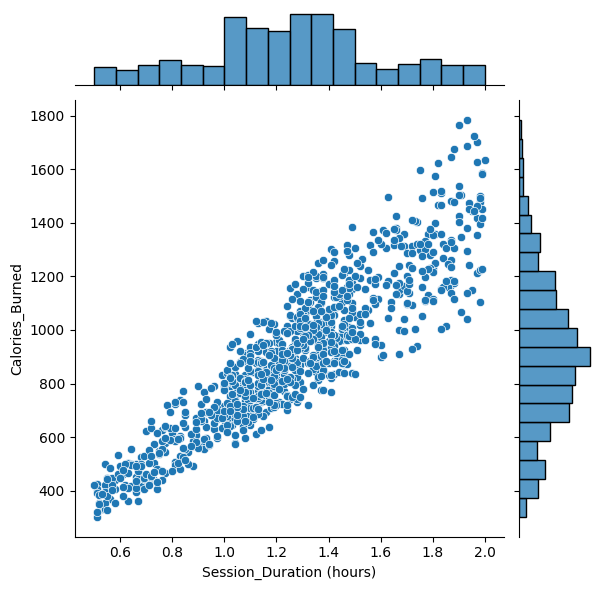

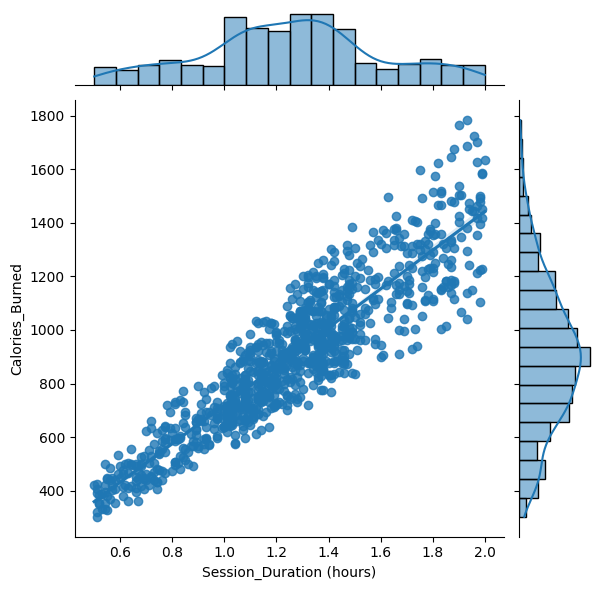

In [43]:
sns.jointplot(x='Session_Duration (hours)', y='Calories_Burned', data=ndf)              # 회귀선 없음
sns.jointplot(x='Session_Duration (hours)', y='Calories_Burned', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

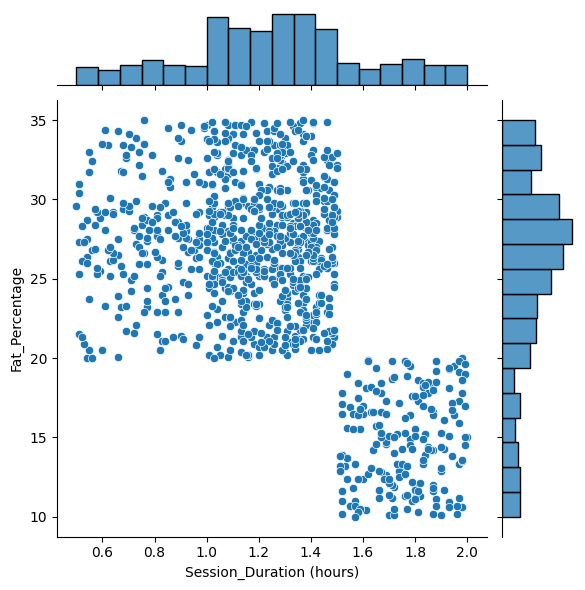

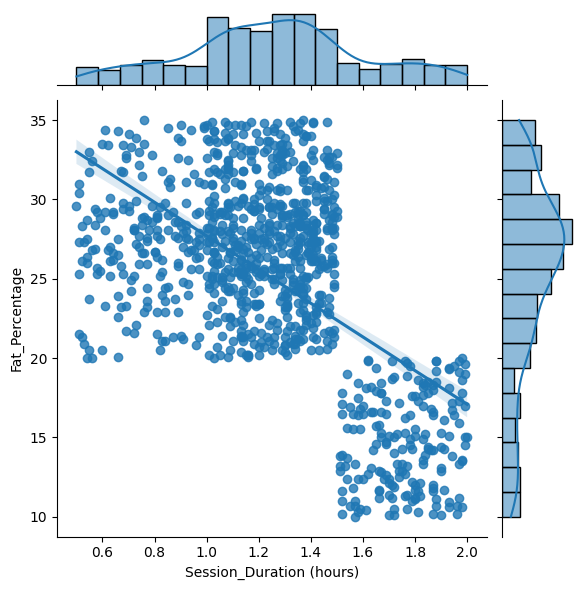

In [44]:
sns.jointplot(x='Session_Duration (hours)', y='Fat_Percentage', data=ndf)              # 회귀선 없음
sns.jointplot(x='Session_Duration (hours)', y='Fat_Percentage', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

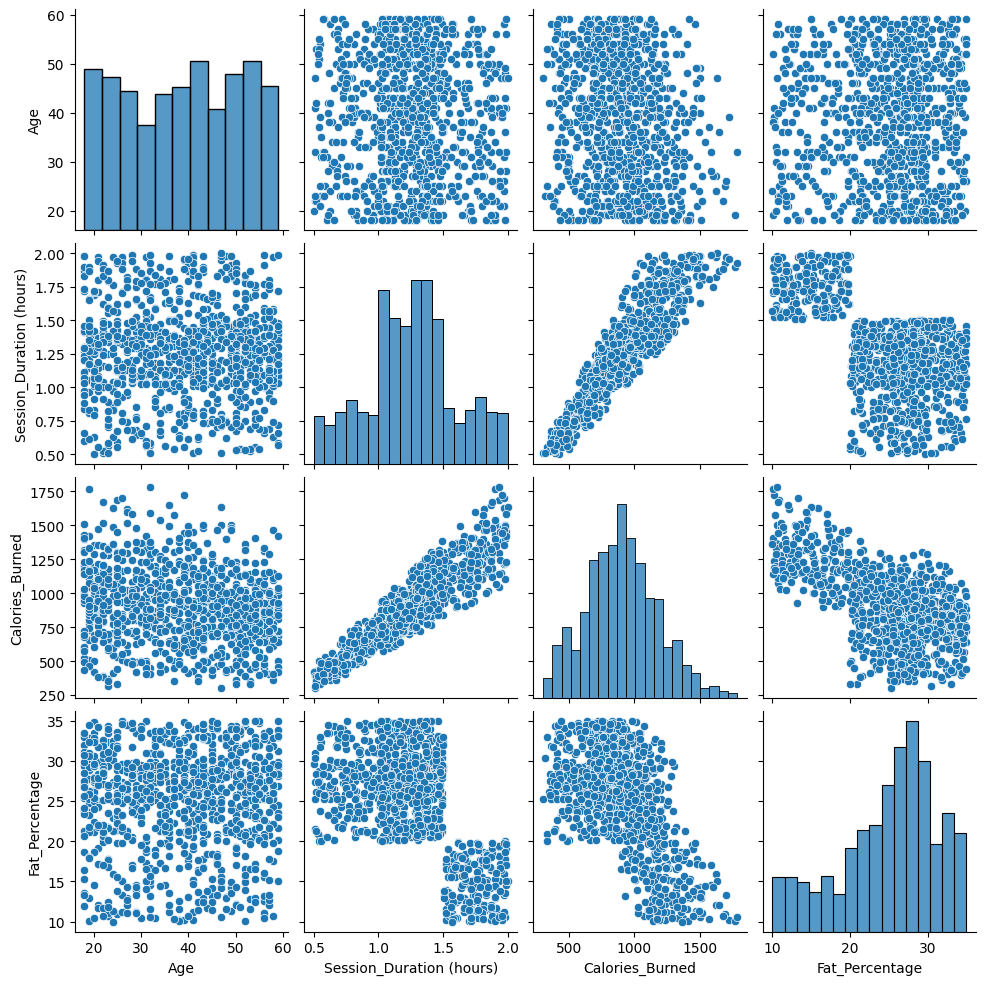

In [45]:
sns.pairplot(ndf)  
plt.show()
plt.close()

In [121]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['Session_Duration (hours)']]  #독립 변수 XSession_Duration (hours)', y='Calories_Burned
y=ndf['Calories_Burned']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))
print(X['Session_Duration (hours)'].unique())

train data 개수:  681
test data 개수:  292
[1.69 1.3  1.11 0.59 0.64 1.59 1.49 1.27 1.03 1.08 0.82 1.15 1.24 1.18
 1.35 1.13 1.33 1.19 1.37 1.5  1.12 1.17 0.78 1.25 1.42 0.73 1.48 1.64
 1.29 1.04 1.52 1.32 1.26 1.34 1.31 1.45 1.14 1.2  0.84 1.41 1.23 1.67
 0.81 1.47 1.4  0.56 1.75 1.97 0.62 1.99 0.89 1.81 1.73 1.07 0.63 1.87
 1.78 0.86 1.09 1.93 1.8  0.58 1.16 0.54 0.97 1.79 0.51 1.74 1.39 1.01
 1.44 1.72 0.55 1.02 1.22 1.   1.28 1.98 0.66 1.61 0.68 1.91 1.38 1.53
 0.7  1.46 1.95 0.83 0.67 1.36 1.57 1.55 1.58 0.92 1.1  1.05 1.54 1.66
 1.71 1.84 1.83 1.21 1.6  0.99 0.77 0.93 0.52 1.06 0.96 1.63 0.8  0.9
 0.53 1.62 1.94 1.85 1.43 0.69 1.82 1.7  1.56 0.57 1.88 1.86 0.85 1.9
 0.6  1.77 0.5  0.72 0.88 1.65 1.51 0.94 0.76 0.91 0.74 0.87 0.61 1.96
 1.68 1.76 0.95 0.75 0.71 2.   0.79]


In [122]:
'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   
# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

기울기 a:  [719.3978687]


y절편 b 0.17926955334860395




In [123]:
print(df['Session_Duration (hours)'].unique())

[1.69 1.3  1.11 0.59 0.64 1.59 1.49 1.27 1.03 1.08 0.82 1.15 1.24 1.18
 1.35 1.13 1.33 1.19 1.37 1.5  1.12 1.17 0.78 1.25 1.42 0.73 1.48 1.64
 1.29 1.04 1.52 1.32 1.26 1.34 1.31 1.45 1.14 1.2  0.84 1.41 1.23 1.67
 0.81 1.47 1.4  0.56 1.75 1.97 0.62 1.99 0.89 1.81 1.73 1.07 0.63 1.87
 1.78 0.86 1.09 1.93 1.8  0.58 1.16 0.54 0.97 1.79 0.51 1.74 1.39 1.01
 1.44 1.72 0.55 1.02 1.22 1.   1.28 1.98 0.66 1.61 0.68 1.91 1.38 1.53
 0.7  1.46 1.95 0.83 0.67 1.36 1.57 1.55 1.58 0.92 1.1  1.05 1.54 1.66
 1.71 1.84 1.83 1.21 1.6  0.99 0.77 0.93 0.52 1.06 0.96 1.63 0.8  0.9
 0.53 1.62 1.94 1.85 1.43 0.69 1.82 1.7  1.56 0.57 1.88 1.86 0.85 1.9
 0.6  1.77 0.5  0.72 0.88 1.65 1.51 0.94 0.76 0.91 0.74 0.87 0.61 1.96
 1.68 1.76 0.95 0.75 0.71 2.   0.79]


In [124]:
# 모형에 테스트 데이터를 입력하여 예측한 값 y_test_hat을 실제 값 y_test와 비교 
y_test_hat = lr.predict(X_test)
y_comp = pd.DataFrame({'y':y_test, 'y_hat':y_test_hat})
print(y_comp)

          y        y_hat
412   440.0   525.339714
173  1195.0  1093.664030
707   870.0   849.068755
359   792.0   647.637351
587   525.0   489.369820
..      ...          ...
261   763.0   762.741010
723   966.0   913.814563
630   807.0   849.068755
556   958.0  1007.336286
100  1625.0  1417.393071

[292 rows x 2 columns]


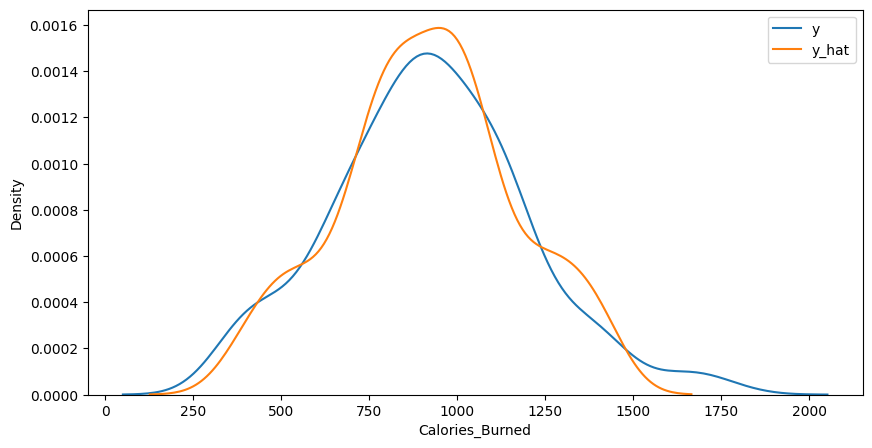

In [125]:
# 모형에 테스트 데이터를 입력하여 예측한 값 y_test_hat을 실제 값 y_test와 비교 
plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y")
ax2 = sns.kdeplot(y_test_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [130]:
# 정확도 및 F1 점수 계산
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_test_hat)
print('MSE : ', mse)

r2 = r2_score(y_test, y_test_hat)
print('R2 : ', r2)

MSE :  14225.69847574529
R2 :  0.8171177418210277


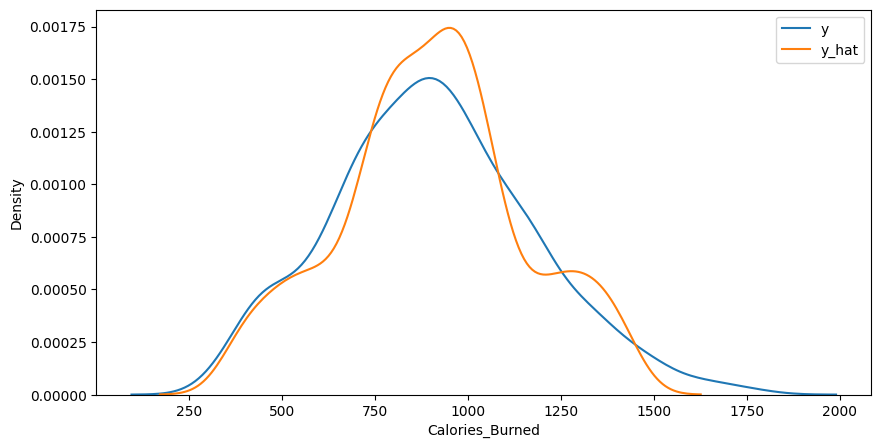

In [ ]:
# 모형에 전체 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)
plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [135]:
import sklearn.metrics as sm
print(sm.mean_squared_error(y_test, y_test_hat))
print(sm.mean_absolute_error(y_test, y_test_hat))
print(sm.r2_score(y_test, y_test_hat))

14225.69847574529
93.67114892657817
0.8171177418210277


In [53]:
'''
Step 5: 비선형회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

print(X_train)
print(X_train_poly)

원 데이터:  (681, 1)
2차항 변환 데이터:  (681, 3)


     Session_Duration (hours)
79                       1.18
133                      1.91
88                       1.45
293                      1.42
324                      1.13
..                        ...
370                      1.30
321                      1.30
528                      1.34
126                      1.28
266                      1.36

[681 rows x 1 columns]
[[1.     1.18   1.3924]
 [1.     1.91   3.6481]
 [1.     1.45   2.1025]
 ...
 [1.     1.34   1.7956]
 [1.     1.28   1.6384]
 [1.     1.36   1.8496]]


In [54]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하기 위해 X_test 데이터를 2차항으로 변형
X_test_poly = poly.fit_transform(X_test)
print(X_test_poly)
y_hat_test = pr.predict(X_test_poly)
print(y_hat_test)
y_comp2 = pd.DataFrame({'y':y_test, 'y_hat':y_hat_test})
print(y_comp2)

[[1.     0.73   0.5329]
 [1.     1.52   2.3104]
 [1.     1.18   1.3924]
 [1.     0.9    0.81  ]
 [1.     0.68   0.4624]
 [1.     1.15   1.3225]
 [1.     1.22   1.4884]
 [1.     0.53   0.2809]
 [1.     1.13   1.2769]
 [1.     1.98   3.9204]
 [1.     1.34   1.7956]
 [1.     1.48   2.1904]
 [1.     1.29   1.6641]
 [1.     1.07   1.1449]
 [1.     0.99   0.9801]
 [1.     1.43   2.0449]
 [1.     0.57   0.3249]
 [1.     1.69   2.8561]
 [1.     0.99   0.9801]
 [1.     1.15   1.3225]
 [1.     1.25   1.5625]
 [1.     0.77   0.5929]
 [1.     1.03   1.0609]
 [1.     1.03   1.0609]
 [1.     0.76   0.5776]
 [1.     1.14   1.2996]
 [1.     0.89   0.7921]
 [1.     1.45   2.1025]
 [1.     1.54   2.3716]
 [1.     1.22   1.4884]
 [1.     0.77   0.5929]
 [1.     1.17   1.3689]
 [1.     1.34   1.7956]
 [1.     1.37   1.8769]
 [1.     1.66   2.7556]
 [1.     1.7    2.89  ]
 [1.     1.23   1.5129]
 [1.     1.48   2.1904]
 [1.     1.8    3.24  ]
 [1.     1.16   1.3456]
 [1.     1.47   2.1609]
 [1.     1.24   

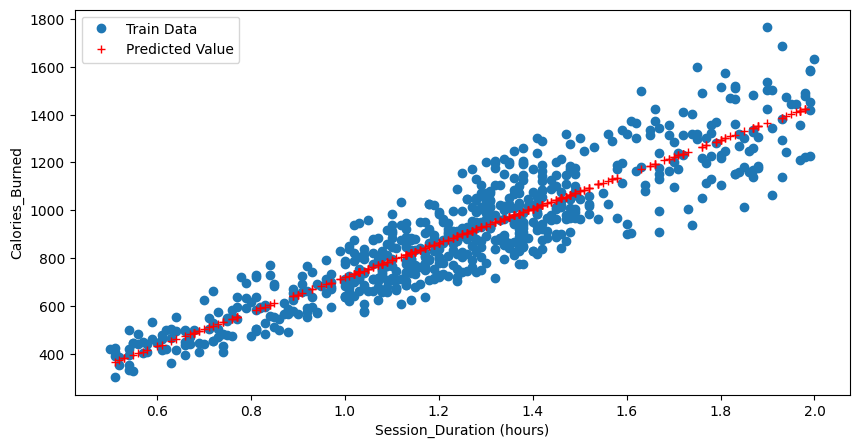

In [55]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('Session_Duration (hours)')
plt.ylabel('Calories_Burned')
plt.show()
plt.close()

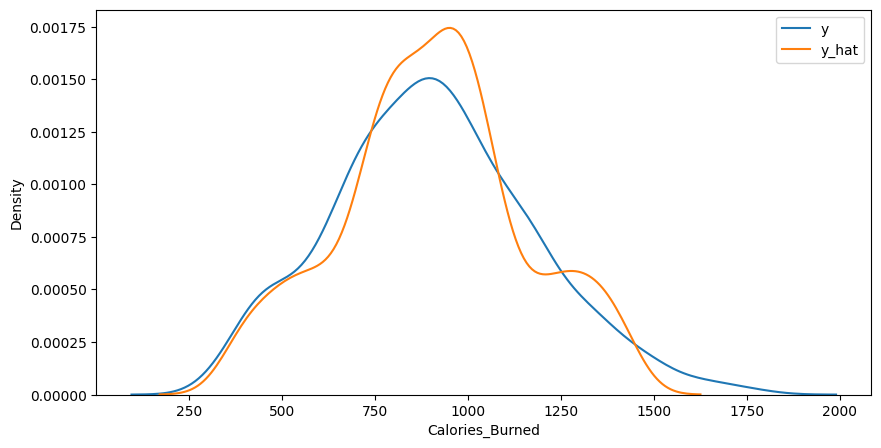

In [56]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [57]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['Calories_Burned']]  #독립 변수 XSession_Duration (hours)', y='Calories_Burned
y=ndf['Fat_Percentage']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  681
test data 개수:  292


In [58]:
'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   
# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

기울기 a:  [-0.01300693]


y절편 b 36.80041924468047




In [59]:
'''
Step 5: 비선형회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=3)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

print(X_train)
print(X_train_poly)

원 데이터:  (681, 1)
2차항 변환 데이터:  (681, 4)


     Calories_Burned
79             864.0
133           1503.0
88            1103.0
293           1054.0
324            949.0
..               ...
370           1036.0
321           1022.0
528            796.0
126            880.0
266           1010.0

[681 rows x 1 columns]
[[1.00000000e+00 8.64000000e+02 7.46496000e+05 6.44972544e+08]
 [1.00000000e+00 1.50300000e+03 2.25900900e+06 3.39529053e+09]
 [1.00000000e+00 1.10300000e+03 1.21660900e+06 1.34191973e+09]
 ...
 [1.00000000e+00 7.96000000e+02 6.33616000e+05 5.04358336e+08]
 [1.00000000e+00 8.80000000e+02 7.74400000e+05 6.81472000e+08]
 [1.00000000e+00 1.01000000e+03 1.02010000e+06 1.03030100e+09]]


In [60]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하기 위해 X_test 데이터를 2차항으로 변형
X_test_poly = poly.fit_transform(X_test)
print(X_test_poly)
y_hat_test = pr.predict(X_test_poly)
print(y_hat_test)
y_comp2 = pd.DataFrame({'y':y_test, 'y_hat':y_hat_test})
print(y_comp2)

[[1.00000000e+00 4.40000000e+02 1.93600000e+05 8.51840000e+07]
 [1.00000000e+00 1.19500000e+03 1.42802500e+06 1.70648988e+09]
 [1.00000000e+00 8.70000000e+02 7.56900000e+05 6.58503000e+08]
 ...
 [1.00000000e+00 8.07000000e+02 6.51249000e+05 5.25557943e+08]
 [1.00000000e+00 9.58000000e+02 9.17764000e+05 8.79217912e+08]
 [1.00000000e+00 1.62500000e+03 2.64062500e+06 4.29101562e+09]]
[26.83815321 20.68478292 27.13074831 28.03175529 28.06225934 26.02570772
 26.69964563 25.74139205 27.93524221 13.24473143 26.72973574 22.07599037
 24.34119772 26.80413245 28.69445253 22.37379919 26.50979441 24.13646815
 28.69716496 27.79039416 23.84466628 28.70420519 27.89500483 28.70737029
 28.68544519 27.02009643 28.70960878 25.36994885 23.28769163 27.29066089
 27.26926405 27.41823746 26.59285541 26.11001186 21.30511625 21.89099565
 27.95501296 25.18352581 16.71333165 26.40453899 22.25968074 26.46803859
 27.19827162 24.48260431 13.73186313 26.12674464 22.80234803 26.40769758
 28.66867211 26.60825072 28.4417

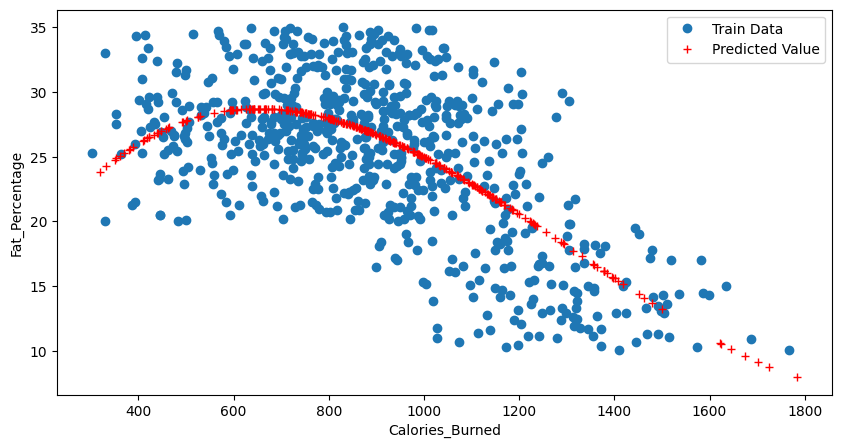

In [61]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('Calories_Burned')
plt.ylabel('Fat_Percentage')
plt.show()
plt.close()

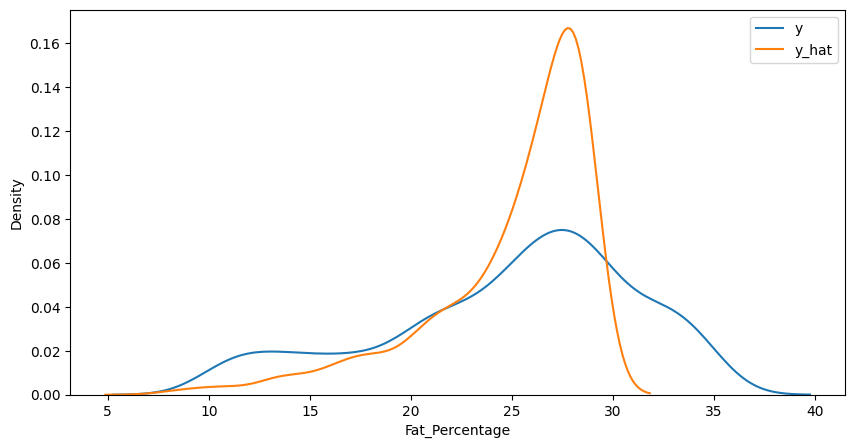

In [62]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [115]:
X=ndf[['Session_Duration (hours)', 'Calories_Burned']]  #독립 변수 XSession_Duration (hours)', y='Calories_Burned
y=ndf['Fat_Percentage']       #종속 변수

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값

# 다항식 변환
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)
print('\n')

print(X_train)

원 데이터:  (681, 2)
2차항 변환 데이터:  (681, 6)


     Session_Duration (hours)  Calories_Burned
79                       1.18            864.0
133                      1.91           1503.0
88                       1.45           1103.0
293                      1.42           1054.0
324                      1.13            949.0
..                        ...              ...
370                      1.30           1036.0
321                      1.30           1022.0
528                      1.34            796.0
126                      1.28            880.0
266                      1.36           1010.0

[681 rows x 2 columns]


0.5221327870796797
[28.30267663 22.36989692 27.56099738 27.01441439 26.88957635 26.8237793
 27.23312615 25.36842446 28.16352369 10.57287732 26.69526059 23.40264587
 25.73692084 27.12403105 28.84983509 23.98501188 25.86270192 20.94609166
 29.14245606 28.04851151 25.55104773 27.10524011 27.8555911  29.20958317
 27.09941254 27.47591414 28.31228207 25.09764065 23.20173727 27.59974986
 28.61200223 27.76462557 26.62778369 26.1711667  20.64871669 20.10899622
 28.01204031 24.6809107  16.28188623 27.08173656 23.58163214 27.04919663
 27.60972292 25.34188896 13.2455611  25.91938403 24.82522361 27.77491596
 28.90863582 27.10081703 28.63830435 28.88406766 28.39290182 27.01158377
 28.27584945 29.29177859 22.54816148 28.13901952 24.4826637  17.77742797
 27.01010605 19.79048811 11.62593753 27.47058178 29.01173997 27.31010764
 22.44380351 20.9182143  26.60969845 25.7685266  27.62026504 11.53795609
 16.88112839 26.46772497 25.70349264 26.70529061 27.56356531 24.68476577
 27.59817984 27.06741574 28.91225

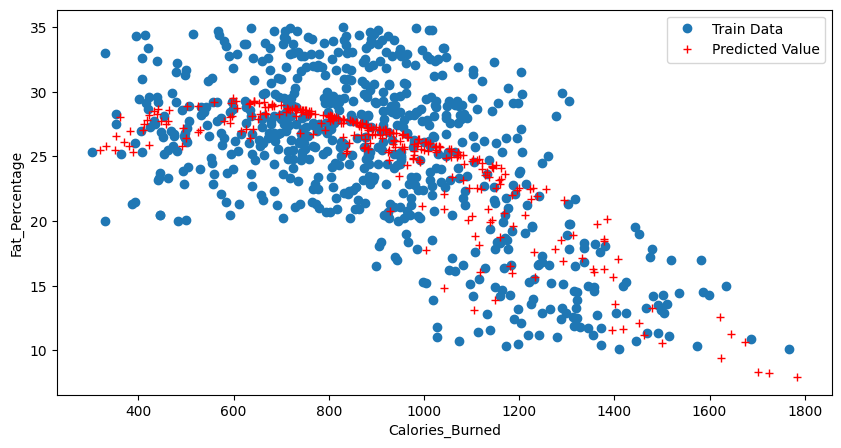

In [119]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

r_square = lr.score(poly.fit_transform(X_test), y_test)
print(r_square)

X_test_poly = poly.fit_transform(X_test)
y_hat_test = lr.predict(X_test_poly)
print(y_hat_test)

print('X 변수의 계수 a:', lr.coef_)
print('상수항 b', lr.intercept_)

y_comp2 = pd.DataFrame({'y':y_test, 'y_hat':y_hat_test})
print(y_comp2)

# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train['Calories_Burned'], y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test['Calories_Burned'], y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('Calories_Burned')
plt.ylabel('Fat_Percentage')
plt.show()
plt.close()

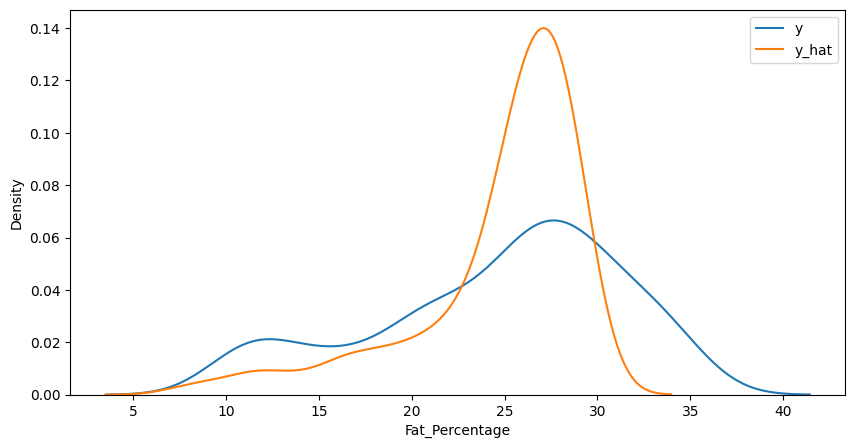

In [120]:
plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y")
ax2 = sns.kdeplot(y_hat_test, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()